预约挂号

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 载入数据
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
# 查询该数据集一共多少行，多少列
df.shape

(110527, 14)

In [4]:
# 查看前五行数据
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# 查看数据信息，包括每列的数据类型以及不为空的列数
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


| 列名           | 非空数量 | 数据类型 | 含义                      |
| -------------- | -------- | -------- | ------------------------- |
| PatientId      | 110527   | float64  | 默认id                    |
| AppointmentID  | 110527   | int64    | 预约卡id                  |
| Gender         | 110527   | object   | 性别                      |
| ScheduledDay   | 110527   | object   | 预约时间                  |
| AppointmentDay | 110527   | object   | 预约卡办理时间            |
| Age            | 110527   | int64    | 年龄                      |
| Neighbourhood  | 110527   | object   | 所属街区                  |
| Scholarship    | 110527   | int64    | 福利保障(1)               |
| Hipertension   | 110527   | int64    | 高血压(1)                 |
| Diabetes       | 110527   | int64    | 糖尿病(1)                 |
| Alcoholism     | 110527   | int64    | 酗酒(1)                   |
| Handcap        | 110527   | int64    | 残障(1)                   |
| SMS_received   | 110527   | int64    | 收到短信(1)               |
| No-show        | 110527   | object   | 未就诊标记(Yes表示未就诊) |


In [6]:
# 查询冗余行
sum(df.duplicated())

0

没有空值和冗余行

In [7]:
# 修改列名(将所有大写变小写，‘No-show’列中的‘-’改为‘_’)
df.rename(columns=lambda x:x.strip().lower().replace("-", "_"), inplace=True)

In [8]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
df.scheduledday

0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
5         2016-04-27T08:36:51Z
6         2016-04-27T15:05:12Z
7         2016-04-27T15:39:58Z
8         2016-04-29T08:02:16Z
9         2016-04-27T12:48:25Z
10        2016-04-27T14:58:11Z
11        2016-04-26T08:44:12Z
12        2016-04-28T11:33:51Z
13        2016-04-28T14:52:07Z
14        2016-04-28T10:06:24Z
15        2016-04-26T08:47:27Z
16        2016-04-28T08:51:47Z
17        2016-04-28T09:28:57Z
18        2016-04-26T10:54:18Z
19        2016-04-29T10:43:14Z
20        2016-04-27T07:51:14Z
21        2016-04-27T10:50:45Z
22        2016-04-25T13:29:16Z
23        2016-04-28T10:27:05Z
24        2016-04-29T14:19:19Z
25        2016-04-26T15:04:17Z
26        2016-04-29T14:19:42Z
27        2016-04-27T10:51:45Z
28        2016-04-29T15:48:02Z
29        2016-04-29T15:16:29Z
                  ...         
110497    2016-06-01T09:46:33Z
110498  

In [10]:
df.appointmentday

0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
5         2016-04-29T00:00:00Z
6         2016-04-29T00:00:00Z
7         2016-04-29T00:00:00Z
8         2016-04-29T00:00:00Z
9         2016-04-29T00:00:00Z
10        2016-04-29T00:00:00Z
11        2016-04-29T00:00:00Z
12        2016-04-29T00:00:00Z
13        2016-04-29T00:00:00Z
14        2016-04-29T00:00:00Z
15        2016-04-29T00:00:00Z
16        2016-04-29T00:00:00Z
17        2016-04-29T00:00:00Z
18        2016-04-29T00:00:00Z
19        2016-04-29T00:00:00Z
20        2016-04-29T00:00:00Z
21        2016-04-29T00:00:00Z
22        2016-04-29T00:00:00Z
23        2016-04-29T00:00:00Z
24        2016-04-29T00:00:00Z
25        2016-04-29T00:00:00Z
26        2016-04-29T00:00:00Z
27        2016-04-29T00:00:00Z
28        2016-04-29T00:00:00Z
29        2016-04-29T00:00:00Z
                  ...         
110497    2016-06-01T00:00:00Z
110498  

修改列数据类型

将`scheduledday`和`appointmentday`改为日期类型


In [9]:
df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)

In [10]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


修改`no_show`列，将YES改为1， NO改为0

In [11]:
df.no_show = df.no_show.map({'No':0, 'Yes':1})

In [12]:
# new_no_show = []
# for value in df.no_show.values:
#     if value == 'No':
#         new_no_show.append(0)
#     elif value == 'Yes':
#         new_no_show.append(1)
# new_no_show = np.array(new_no_show)
# df.no_show = new_no_show

In [13]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 11.8+ MB


In [15]:
df.neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

未就诊与年龄是否有相关性

In [16]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [17]:
# 删除年龄为-1的行
df.drop(df[df.age==-1].index, inplace=True)

In [18]:
df_1 = df[df.no_show==1]

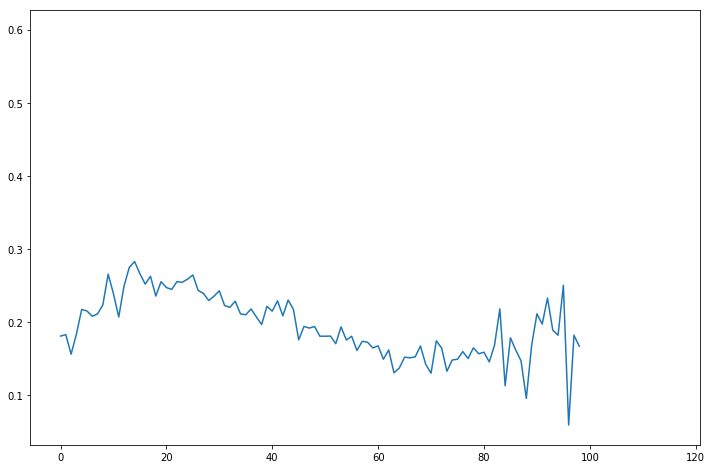

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(df.groupby('age').no_show.count().index, df_1.groupby('age').no_show.count() / df.groupby('age').no_show.count());

通过直方图可见，年龄与就诊率无相关关系

参与社保的就诊率是否会提高

In [20]:
# 无社保的数据集
df_no_scholarship = df[df.scholarship==0]

In [21]:
# 有社保的数据集
df_yes_scholarship = df[df.scholarship==1]

In [22]:
# 无社保的未就诊率
df_no_scholarship[df_no_scholarship.no_show==1].no_show.count() / df_no_scholarship.no_show.count()

0.19807354638037425

In [23]:
# 有社保的未就诊率
df_yes_scholarship[df_yes_scholarship.no_show==1].no_show.count() / df_yes_scholarship.no_show.count()

0.2373630420771568

<BarContainer object of 2 artists>

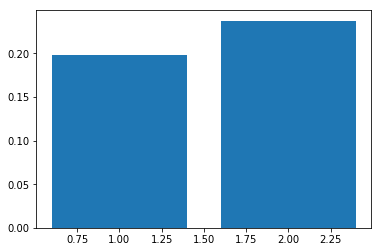

In [24]:
plt.bar([1, 2], [df_no_scholarship[df_no_scholarship.no_show==1].no_show.count() / df_no_scholarship.no_show.count(), df_yes_scholarship[df_yes_scholarship.no_show==1].no_show.count() / df_yes_scholarship.no_show.count()])

有社保的未就诊率高于无社保的未就诊率

收到短信与就诊率的关系

In [25]:
# 收到短信的数据集
df_yes_sms_received = df[df.sms_received==1]

In [26]:
# 未收到短信的数据集
df_no_sms_received = df[df.sms_received==0]

In [27]:
# 收到短信的未就诊率
df_yes_sms_received[df_yes_sms_received.no_show==1].no_show.count() / df_yes_sms_received.no_show.count()

0.27574544839637

In [28]:
# 未收到短信的未就诊率
df_no_sms_received[df_no_sms_received.no_show==1].no_show.count() / df_no_sms_received.no_show.count()

0.16703533926762965

<BarContainer object of 2 artists>

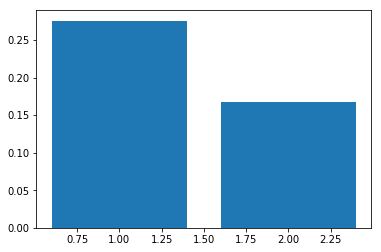

In [29]:
plt.bar([1, 2], [df_yes_sms_received[df_yes_sms_received.no_show==1].no_show.count() / df_yes_sms_received.no_show.count(), df_no_sms_received[df_no_sms_received.no_show==1].no_show.count() / df_no_sms_received.no_show.count()])

收到短信的未就诊率高于未收到短信的未就诊率

sms_received
0    75044
1    35482
dtype: int64

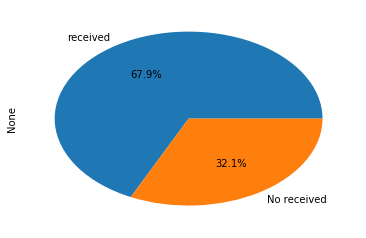

In [39]:
df_sms = df.groupby('sms_received').size()
df_sms.plot(kind='pie', labels=['received','No received'], autopct='%.1f%%');

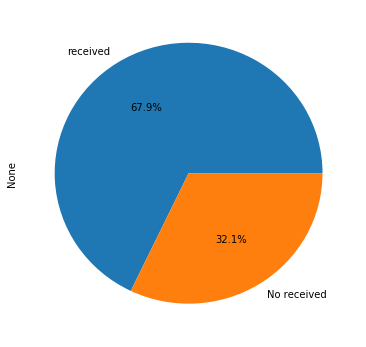

In [44]:

df_sms.plot.pie(labels=['received','No received'], autopct='%.1f%%',figsize=(6,6))

In [ ]:
df_1 = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])

In [45]:
 df.groupby('scholarship').size()

scholarship
0    99665
1    10861
dtype: int64

In [50]:
df_1 = df[df.scholarship==1]

In [51]:
df_0 = df[df.scholarship==0]

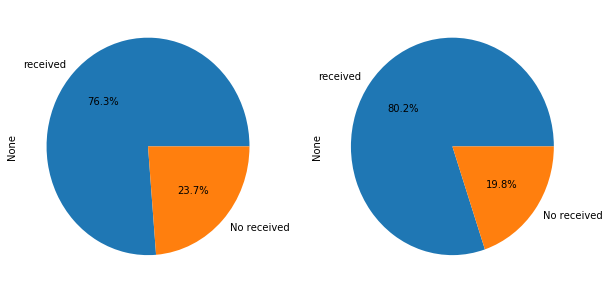

In [65]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df_1_show = df_1.groupby('no_show').size()
df_1_show.plot(kind='pie', labels=['visiting','No visiting'], autopct='%.1f%%');
plt.subplot(122)
df_0_show = df_0.groupby('no_show').size()
df_0_show.plot(kind='pie', labels=['received','No received'], autopct='%.1f%%');

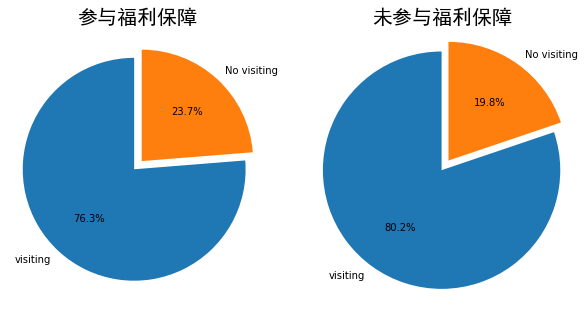

In [76]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('参与福利保障',  fontproperties='SimHei', fontsize=20)
labels = ['visiting','No visiting']
sizes_1 = df_1.groupby('no_show').size()
explode = (0, 0.1)
plt.pie(sizes_1, explode=explode, labels=labels, autopct='%.1f%%',shadow=False,startangle=90);
plt.axis('equal');
plt.subplot(122)
plt.title('未参与福利保障',  fontproperties='SimHei', fontsize=20)
sizes_0 = df_0.groupby('no_show').size()
plt.pie(sizes_0, explode=explode, labels=labels, autopct='%.1f%%',shadow=False,startangle=90);
plt.axis('equal');